In [64]:
import numpy as np
import matplotlib.pyplot as plt

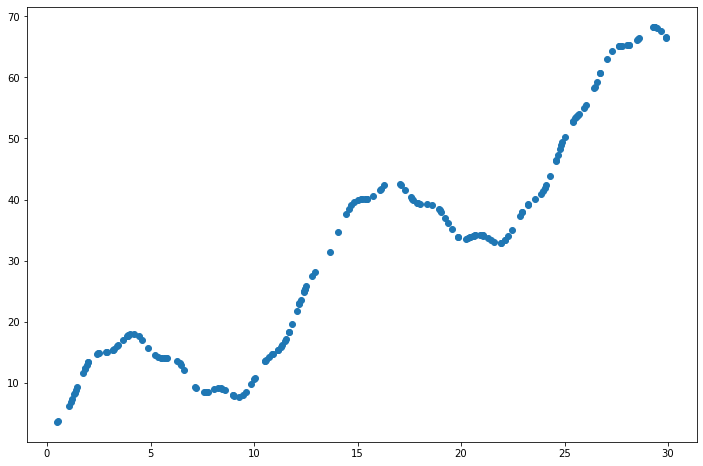

In [65]:
# Creating a synthetic dataset using numpy
x = np.random.uniform(low = 0, high = 30, size = 200)
y = 10 * np.sin(0.5 * x) + np.cos(3 * x) + 2 * x
plt.figure(figsize = (12, 8))
plt.scatter(x, y)

In [66]:
np.min(x)

0.5015415231375764

In [67]:
# Prepare x matrix by adding dummy feature into it
def prepare_matrices(x, y):
    '''
    This function prepares x matrix (by adding a dummy feature, x0) and y matrix.
    Dummy feature: Feature whose value is 1
    
    Arguements:
    x: Numpy array of shape (m, 1), m = number of examples
    y: Numpy array of shape (m, 1)
    
    Returns:
    x: Feature Matrix (numpy array of shape (m, 2)
    y = Output Vector / Target Vector (numpy array of shape (m, 1))
    '''
    m = x.shape[0]
    x_0 = np.ones(shape = (m, 1))
    x_1 = x.reshape((m, 1))
    x = np.concatenate((x_0, x_1), axis = 1)
    y = y.reshape((m, 1))
    return x, y

In [68]:
def initialize_parameter_matrix(n, method = 'zeros'):
    '''
    This function initializes parameter matrix.
    
    Arguements:
    n: Number of features (This include dummy featue x0)
    method: zeros / random. The method used to initialize paramter matrix.
    (default: 'zeros', i.e. initialization with zeros)
    
    Returns:
    theta: Parameter matrix of shape (n, 1), n = number of features 
    '''
    if method == 'zeros':
        theta = np.zeros(shape = (n, 1))
    elif method == 'random':
        theta = np.random.rand(n, 1)
    
    return theta

In [69]:
def weight_calc(x, x1, t):
    '''
    This function calculates weight matrix
    
    Arguements:
    x: Numpy array of shape (m, 1), m = number of examples
    x1: Value of x at which value of y is to be predicted
    t: Bandwidth parameter
    
    Returns:
    w: Weight vector (Numpy array of shape (m, 1))
    '''
    m = x.shape[0]
    int_term = (np.square(x - x1)) / (2 * (t**2))
    w = np.exp(-int_term)
    w = w.reshape((m, 1))
    return w

In [70]:
def hypothesis_calc(theta, x):
    '''
    This function calculates hypothesis matrix.
    
    Arguements:
    theta: Parameter matrix of shape (n, 1), n = number of features
    x: Feature matrix of shape (m, n), m = number of examples
    
    Returns:
    h: Calculated hypothesis matrix of shape (m, 1)
    '''
    h = np.sum(np.transpose(theta) * x, axis = 1)
    m = x.shape[0]
    h = h.reshape((m, 1))
    return h

In [71]:
def cost_calc(x, y, x1, theta, t):
    '''
    This function calculates cost.
    
    Arguements:
    x: Numpy array of shape (m, 2), m = number of examples
    y: Numpy array of shape (m, 1)
    x1: Value of x at which value of y is to be predicted
    theta: Parameter matrix of shape (n, 1), n = number of features
    t: Bandwidth parameter
    
    Returns:
    cost: Scalar value of cost for locally weighted linear regression 
    '''
    w = weight_calc(x[:, 1], x1, t)
    h = hypothesis_calc(theta, x)
    cost = np.sum(w * np.square(y - h))
    return cost

In [72]:
def update_gradients(x, y, theta, w, learning_rate):
    '''
    This function updates parameter matrix using batch gradient descent algorithm.
    
    Arguements:
    x: Feature matrix of shape (m, n), m = number of training examples, n = number of features
    y: Output matrix of shape (m, 1), m = number of training examples
    theta: Parameter matrix of shape (n, 1)
    w: weight matrix of shape (m, 1)
    learning_rate: Value of learning rate to be used to update parameter matrix
    
    Returns:
    theta: Updated parameter matrix of shape (n, 1)
    ''' 
    h = hypothesis_calc(theta, x)
    int_term = 2 * np.sum(np.multiply(w, np.multiply((h-y), x)), axis = 0)
    n = x.shape[1]
    int_term = int_term.reshape((n,1))
    theta = theta - (learning_rate * int_term)
    return theta

In [73]:
def convergence_check(costs, epsilon):
    '''
    This function checks convergence of gradient descent algorithm.
    
    Arguements:
    costs: A list containing cost values of current and previous iterations
    epsilon: Threshold of square error difference between costs of consecutive iterations used to
    decide convergence of gradient descent algorithm
    
    Returns:
    Boolean (True / False) value of whether algorithm has been converged
    '''
    error = (costs[0] - costs[1]) ** 2
    return error < epsilon

In [74]:
def lwlr(x, y, x1, t, num_iterations = 50000, algo_type = 'batch', 
                                   learning_rate = 0.00001, epsilon = 1e-04, verbose = True, initialization = 'zeros'):
    '''
    This function performs linear regression using gradient descent algorithm for minimising cost.
    
    Arguements:
    x: Feature matrix of shape (m, n), m = number of training examples, n = number of features
    y: Output matrix of shape (m, 1)
    x1: Value of x at which value of y is to be predicted
    t: Bandwidth parameter
    num_iterations (optional): Max number of iterations (default value: 50000) (if convergence is acheived before this number,
    algorithm will be stopped)
    learning_rate (optional): Value for learning rate (default value: 0.01)
    epsilon (optional): Threshold of square error difference between costs of consecutive iterations used to
    decide convergence of gradient descent algorithm (default value = 1e-04)
    verbose (optional): Boolean value which decide whether the output of the algorithm will be verbose
    initialization (optional): 'zeros' / 'random', parameter used for method of initialization of parameter matrix
    
    Returns:
    theta: Parameter matrix of shape (n, 1)
    costs: A dictionary with learning rate as key and list of costs for every 100th iteration as value
    
    Note: Ensure that dummy variable (x0) has been already added to the x matrix before passing through this function
    '''
    m = x.shape[0]
    n = x.shape[1]
    w = weight_calc(x[:, 1], x1, t)
    if algo_type == 'normal':
        w = w.reshape((m,))
        w_diag = np.diag(w)
        int_term1 = np.matmul(np.matmul(np.transpose(x), w_diag), x)
        int_term2 = np.matmul(np.matmul(np.transpose(x), w_diag), y)
        theta = np.matmul(np.linalg.inv(int_term1), int_term2)
        costs = cost_calc(x, y, x1, theta, t)
        return theta, costs
    theta = initialize_parameter_matrix(n)
    cost = cost_calc(x, y, x1, theta, t)
    if verbose == True:
        print('Initial Parameters:')
        print('Parameter 1:', theta[0][0])
        print('Parameter 2:', theta[1][0])
        print('Initial Cost:', cost)
        print('*************************************')
    costs = {}
    costs_list = []
    costs_list.append(cost)    
    if algo_type == 'batch':
        for i in range(num_iterations):
            theta = update_gradients(x, y, theta, w, learning_rate)
            cost = cost_calc(x, y, x1, theta, t)
            if verbose == True:
                if ((i + 1) % 1000) == 0:
                    print('Iteration:', i+1)
                    print('Cost:', cost)
                    print('Parameter 1:', theta[0][0])
                    print('Parameter 2:', theta[1][0])
                    print('*************************************')
            if ((i + 1) % 1000) == 0:
                costs_list.append(cost)
            if len(costs_list) >= 2:
                if convergence_check(costs_list[-2:], epsilon):
                    print('Alogorithm has converged')
                    break
        costs[learning_rate] = costs_list
    elif algo_type == 'stochastic':
        for i in range(num_iterations):
            index = i % (len(y) - 1)
            for j in range(n):
                theta[j][0] = theta[j][0] - learning_rate * w[index] * (h[index] - y[index]) * x[index, :][j]
            cost = cost_calc(x, y, x1, theta, t)
            if verbose == True:
                if ((i + 1) % 1000) == 0:
                    print('Iteration:', i+1)
                    print('Cost:', cost)
                    print('Parameter 1:', theta[0][0])
                    print('Parameter 2:', theta[1][0])
                    print('*************************************')
            if ((i + 1) % 1000) == 0:
                costs_list.append(cost)
            if len(costs_list) >= 2:
                if convergence_check(costs_list[-2:], epsilon):
                    print('Alogorithm has converged')
                    break
        costs[learning_rate] = costs_list
    return theta, costs

In [75]:
x_mat, y_mat = prepare_matrices(x, y)
x_array = np.linspace(0, 30, num = 15)
t_array = [0.5, 2, 4, 8]
x_array_pred = {}
for j in t_array:
    print('Bandwidth: {}'.format(j))
    l = []
    for i in x_array:
        print('X: {}'.format(i))
        theta, costs = lwlr(x_mat, y_mat, i , j, algo_type = 'batch', verbose = False)
        l.append(theta[0][0] + i * theta[1][0])
    x_array_pred[j] = l

Bandwidth: 0.5
X: 0.0
X: 2.142857142857143
X: 4.285714285714286
X: 6.428571428571429
X: 8.571428571428571
Alogorithm has converged
X: 10.714285714285714
X: 12.857142857142858
Alogorithm has converged
X: 15.0
Alogorithm has converged
X: 17.142857142857142
Alogorithm has converged
X: 19.285714285714285
X: 21.428571428571427
Alogorithm has converged
X: 23.57142857142857
Alogorithm has converged
X: 25.714285714285715
Alogorithm has converged
X: 27.857142857142858
Alogorithm has converged
X: 30.0
Alogorithm has converged
Bandwidth: 2
X: 0.0
Alogorithm has converged
X: 2.142857142857143
Alogorithm has converged
X: 4.285714285714286
Alogorithm has converged
X: 6.428571428571429
X: 8.571428571428571
X: 10.714285714285714
X: 12.857142857142858
X: 15.0
X: 17.142857142857142
X: 19.285714285714285
X: 21.428571428571427
X: 23.57142857142857
X: 25.714285714285715
X: 27.857142857142858
X: 30.0
Bandwidth: 4
X: 0.0
Alogorithm has converged
X: 2.142857142857143
Alogorithm has converged
X: 4.285714285714

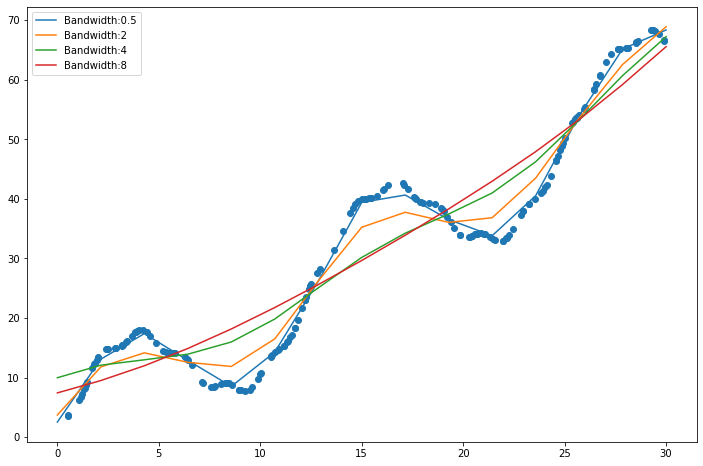

In [76]:
plt.figure(figsize = (12, 8))
plt.scatter(x, y)
y_pred = hypothesis_calc(theta, x_mat)
for i in t_array:
    plt.plot(x_array, x_array_pred[i], label = 'Bandwidth:{}'.format(i))
plt.legend()

In [77]:
x_mat, y_mat = prepare_matrices(x, y)
x_array = np.linspace(0, 30, num = 15)
t_array = [0.5, 2, 4, 8]
x_array_pred = {}
for j in t_array:
    l = []
    for i in x_array:
        theta, _ = lwlr(x_mat, y_mat, i , j, algo_type = 'normal')
        l.append(theta[0][0] + i * theta[1][0])
    x_array_pred[j] = l

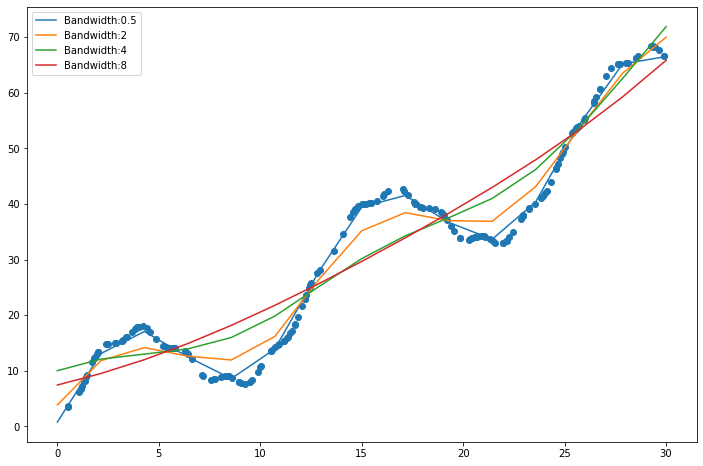

In [78]:
plt.figure(figsize = (12, 8))
plt.scatter(x, y)
for i in t_array:
    plt.plot(x_array, x_array_pred[i], label = 'Bandwidth:{}'.format(i))
plt.legend()